# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2021-s109a/blob/master/lectures/crest.png?raw=true"> CS-S109A Introduction to Data Science 

## Final Exam: COVID-19 Modeling

**Harvard University**<br/>
**Summer 2021**<br/>
**Instructors**: Kevin Rader


<hr style='height:2px'>

---



### INSTRUCTIONS

- This final exam is to be completed indivudally.  Do not consult with your peers when working on it (you can aks the teaching staff for clarification questions, including private messages on Ed).
- To submit your assignment follow the instructions given in Canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

**Note: for all problems, it is up to you to decide how to transform the data (standardization, log transformations, etc.).  Be sure you use and interpret theses transformations approporiately.**

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns

# You are free to use any functions/methods within these packages (BS4, ELI5, and LIME are fine too)
# if you would like to use any other, please contact hte teaching staff 

<hr style="height:2pt">

# Analyzing the recent spread of COVID-19 

![](fig/vaccine.jpeg)

You are tasked with using the COVID case and vaccination data across counties presented by the CDC to analyze the recent surge in COVID infections and the association with (amonth other predictors).  You are also tasked with building prediction models to forecast how the disease spread will change based on data from the previous week (and  demographic and other measures.

The exam broken into 4 problems:
- Problem 1: Data Wrangling and Explorations
- Problem 2: Interpretive Linear Regression Modeling
- Problem 3: Prediction Modeling
- Problem 4: Further Analysis

You are provided with four raw data files, and a 5th cleaned file is provided to be used for all EDA and modeling tasks.

The variables included in each of the four raw data sets are:

For 'covid_cases_county.csv' (note: counties show up many times in this dataset: once for each data they report the number of cases):
- `date`: the date of the measurement, taken weekly
- `county`: county name
- `state`: the state in which the county lies
- `fips`: the unique Federal Information Processing System (FIPS) codes for the county
- `cases`: the cumulative number of confirmed positive cases up to and including that date
- `deaths`: the cumulative number of confirmed COVID-related deaths up to and including that date


For 'vaccines_county.csv' (note: counties show up many times in this dataset: once for each data they report the number of cases):
- `date`: the date of the measurement, taken weekly
- `fips`: the unique FIPS code for the county
- `fully`: the percent of residents that are fully vaccinated in the county on that date
- `dose1`: the percent of residents that have received at least one vaccine dose in the county on that date.

For 'masks_county.csv' (note: this is based on a survey conducted by the New York Times in summer of 2020):
- `fips`: the unique FIPS code for the county
- `never`: the percent of respondents that report they never wore masks in public
- `rarely`: the percent of respondents that report they rarely wore masks in public
- `sometimes`: the percent of respondents that report they sometimes wore masks in public	
- `frequently`: the percent of respondents that report they frequently wore masks in public	
- `always`: the percent of respondents that report they always wore masks in public

For 'demographics_county.csv' (note: these are various measures taken from 2010 to 2020):
- `fips`: the unique FIPS code for the county
- `population`: total number of residents in the country	
- `hispanic`: the percentage of residents that self-identify as hispanic
- `minority`: the percentage of residents that self-identify as a minority group (non-white)
- `female`: the percentage of residents that self-identify as female
- `unemployed`: the percentage of residents that are unemployed
- `income`: the median household income, in thousnads of dollards
- `nodegree`: the percentage of residents that report not having graduated high school
- `bachelor`: the percentage of residents that report having a college degree
- `inactivity`: the percentage of residents that get less than 1 hour of vigorous exercise a week
- `obesity`: the percentage of residents that are considered obese based on BMI
- `density`: the population density (residents per square mile)
- `votergap20`: Biden voting percentage minus Trump voting percentage in the 2020 election
- `votergap16`: Clinton voting percentage minus Trump voting percentage in the 2016 election


### Data Sources
- Vaccinations [here](https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh).
- Cases [here](https://github.com/nytimes/covid-19-data).
- Mask Usage [here](https://github.com/nytimes/covid-19-data/tree/master/mask-use).
- Demographics [here](https://www.ers.usda.gov/data-products/county-level-data-sets/) 
- 2020 Election [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ)



## Question 1 [25pts]: Data Wrangling and Explorations </b></div>

**1.1** Load the data sets as follows:
- 'covid_cases_county.csv' as `covid_raw` 
- 'vaccines_county.csv' as `vaccines_raw`
- 'masks_county.csv' as `masks`
- 'demographics_county.csv' as `demo` 

**1.2** Create a subset of the `covid_raw` data frame that only contains the measures for 5 dates: June 27 and July 4, 11, 18 and 25.  Do the same for the `vaccines_raw`.  Call these subsets `covid` and `vaccines`, respectively, and print out their dimensions (aka, shapes).

**1.3** Determine and print the number of counties that are measured for each time period in `covid` and `vaccines` (do not print out the list of counties, just the number/count).  Comment on what this implies for presence of missing data.

**1.4** Process both `covid` and `vaccines` so that each county is represented by a single row in each data frame (rather than having 5 separate rows for each county: 1 for each time period in part 1.2).  Call these new generate Pandas data frames `covid_by_county` and `vaccines_by_county` separately.  Print out the dimensions of each resulting data frame, and view the header of `covid_by_county`.  Note: you should use informative names for the columns in the resulting data frames: for example, `cases_w30` for the cumulative number of cases on July 25 (it's the 30th week of the calendar year).

**Hint**: Splitting based on dates and then using `pd.DataFrame.merge` (source)[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html] could be helpful for this task using the `fips` code as the keys to join on (you should drop any counties that are not measured in all time periods...the default argument for `how` in `pd.DataFrame.merge` will behave this way).

**1.5** Merge the 4 data fames (`covid_by_county`, `vaccines_by_county`, `masks`, and `demo`) based on `fips` and save the result as `covid_merged` (you should drop any counties that are not measured in all 4 data frames).  Determine and report how many counties were dropped from `demo` in this process, and view the header of `covid_merged`.

**1.6** Use `covid_merged` to calculate the novel case rate (per 1000 residents) for each of the weeks for all of the counties, and save these as 4 new well-named variables in `covid_merged`.  For example, `rate_w30` can mathematically be represented as `1000*(cases_30-cases_29)/population`.  Plot the histogram of the novel case rate in week 29, `rate_w29`, and comment on what you notice.

**1.7** We did the steps above (and some other minimal processing) and saved the results in `covid_clean.csv` for you.  Use this data file to answer some exploratory questions and all future analyses: 

1. Has the overall average case rate increased from week 28 (July 5-11) to week 29 (July 12-18)?  
2. Treating the counties as separate and equal observations: in what states did the case rate increase the most?  In what states did the case rate decrease the most (or increse the least)?  List the top 5 for each.  Do you notice any patterns in these states?
3. Create and interpret separate visuals to display how the country case rate in week 29 relates to each of the following variables. Interpret what you see (be specific to this domain).

    a. The political views in the county (as measured by the votergap in the 2020 election).
    
    b. The vaccination rate in the county (for week 28) (be sure to throw away the zeros as these represent unreported values).
    
    c. The population density of the county.
    
    d. Whether 50% or more of the surveyed residents in the county report that they always wore a mask in public at the time of the survey.

## Answers

**1.1** Load the data sets as follows:
- 'covid_cases_county.csv' as `covid_raw` 
- 'vaccines_county.csv' as `vaccines_raw`
- 'masks_county.csv' as `masks`
- 'demographics_county.csv' as `demo` 

Print out each of their dimensions (aka, shapes).

In [134]:
# Saving data sets
covid_raw = pd.read_csv('data/covid_cases_county.csv')
vaccines_raw = pd.read_csv('data/vaccines_county.csv')
masks = pd.read_csv('data/masks_county.csv')
demo = pd.read_csv('data/demographics_county.csv')

# Printing dimentions
print(f'The shape of covid_raw is {covid_raw.shape}')
print(f'The shape of vaccines_raw is {vaccines_raw.shape}')
print(f'The shape of masks is {masks.shape}')
print(f'The shape of demo is {demo.shape}')

The shape of covid_raw is (97394, 6)
The shape of vaccines_raw is (96720, 4)
The shape of masks is (3142, 6)
The shape of demo is (3114, 14)


**1.2** Create a subset of the `covid_raw` data frame that only contains the measures for 5 dates: June 27 and July 4, 11, 18 and 25.  Do the same for the `vaccines_raw`.  Call these subsets `covid` and `vaccines`, respectively, and print out their dimensions (aka, shapes).


In [3]:
# Creating a subset for specified dates:
covid = covid_raw[(covid_raw['date']=='2021-06-27') | 
                  (covid_raw['date']=='2021-07-04') | 
                  (covid_raw['date']=='2021-07-11') |
                  (covid_raw['date']=='2021-07-18') | 
                  (covid_raw['date']=='2021-07-25')]

In [152]:
# Doing the same for vaccines_raw:
vaccines = vaccines_raw[(vaccines_raw['date']=='2021-06-27') | 
                  (vaccines_raw['date']=='2021-07-04') | 
                  (vaccines_raw['date']=='2021-07-11') |
                  (vaccines_raw['date']=='2021-07-18') | 
                  (vaccines_raw['date']=='2021-07-25')]

# Printing dimentions
print(f'The shape of covid is {covid.shape}')
print(f'The shape of vaccines is {vaccines.shape}')
# vaccines

The shape of covid is (16227, 6)
The shape of vaccines is (16120, 4)


**1.3** Determine and print the number of counties that are measured for each time period in `covid` and `vaccines` (do not print out the list of counties, just the number/count).  Comment on what this implies for presence of missing data.


,date,county,state,fips,cases,deaths
90992,2021-07-18,Unknown,Alaska,NaN,313,0.0
91082,2021-07-18,Unknown,Arkansas,NaN,3093,0.0
91217,2021-07-18,Unknown,Connecticut,NaN,1176,1.0
91222,2021-07-18,Unknown,Delaware,NaN,227,0.0
91287,2021-07-18,Unknown,Florida,NaN,3,1422.0
91436,2021-07-18,Unknown,Georgia,NaN,3036,6.0
91452,2021-07-18,Unknown,Guam,NaN,9446,143.0
91593,2021-07-18,Unknown,Illinois,NaN,0,440.0
91785,2021-07-18,Unknown,Iowa,NaN,455,0.0
92078,2021-07-18,Unknown,Louisiana,NaN,394,0.0


In [161]:
# There are many cointies names that appears in several states. Therefore we need to use the fips column to identify the 
#number of unique counties for both sets.

# Printing the number of counties for each date in covid, incase one date has less counties:
dates = ['2021-06-27','2021-07-04','2021-07-11','2021-07-18','2021-07-25']
print('The number of counties in the covid set is:')
for d in dates:
    nrCounties = len(covid.fips[covid['date']==d].value_counts())  
    print(f' {nrCounties} at date {d}')
# Choosing not to remove null values yet, and using value_counts to get the number of real values for fips.

The number of counties in the covid set is:
 3218 at date 2021-06-27
 3218 at date 2021-07-04
 3218 at date 2021-07-11
 3218 at date 2021-07-18
 3218 at date 2021-07-25


In [122]:
# The number of counties in vaccines:
print('The number of counties in the vaccines set is:')
for d in dates:
    nrFips = len(vaccines.fips[vaccines['date']==d].value_counts())
    print(f' {nrFips} at date {d}')

The number of counties in the vaccines set is:
 3224 at date 2021-06-27
 3224 at date 2021-07-04
 3224 at date 2021-07-11
 3224 at date 2021-07-18
 3224 at date 2021-07-25


##### Answer 1.3:
The vaccines set has 3224 counties while covid has 3218.
This is because the data sets are also including counties in Puerto Rico, Virgin Islands, Northern Mariana and Guam. If you were to only count the 50 states of US you would get 3218-83= 3135 counties for the covid set and 3224-82= 3142 counties in the vaccines set. The number for the vaccines set is almost the same as wikipedias number of counties for the 50 states of US (3143 in 2020), while the covid set is missing 7 more counties. Three of the missing counties have the state column filled, and can be identified as York City, Cansas City and Joplin. These should be added in if we want to use this for prediction or EDA, especially New York City because of its large population. However, I am not doing that here, because the task is not asking for cleaning of the data.

**1.4** Process both `covid` and `vaccines` so that each county is represented by a single row in each data frame (rather than having 5 separate rows for each county: 1 for each time period in part 1.2).  Call these new generate Pandas data frames `covid_by_county` and `vaccines_by_county` separately.  Print out the dimensions of each resulting data frame, and view the header of `covid_by_county`.  Note: you should use informative names for the columns in the resulting data frames: for example, `cases_w30` for the cumulative number of cases on July 25 (it's the 30th week of the calendar year).

**Hint**: Splitting based on dates and then using `pd.DataFrame.merge` (source)[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html] could be helpful for this task using the `fips` code as the keys to join on (you should drop any counties that are not measured in all time periods...the default argument for `how` in `pd.DataFrame.merge` will behave this way).




In [299]:
# Splitting the dataset into separate ones for each week:
w26 = vaccines[vaccines['date']=='2021-06-27'].dropna()
w27 = vaccines[vaccines['date']=='2021-07-04'].dropna()
w28 = vaccines[vaccines['date']=='2021-07-11'].dropna()
w29 = vaccines[vaccines['date']=='2021-07-18'].dropna()
w30 = vaccines[vaccines['date']=='2021-07-25'].dropna()

vaccines_by_county = w26.merge(w27.merge(w28.merge(w29.merge(w30,on='fips'),on='fips'),on='fips'),on='fips')
vaccines_by_county.pop('date') # Removing all date columns, since the week number is the new index
vaccines_by_county.pop('date_x')
vaccines_by_county.pop('date_y')
vaccines_by_county.columns = ['fips', 'fully_w26','dose1_w26','fully_w27','dose1_w27',
              'fully_w28','dose1_w28','fully_w29','dose1_w29','fully_w30','dose1_w30']

print(f'The shape of vaccines_by_county is {vaccines_by_county.shape}')
# vaccines_by_county.tail(50)

The shape of vaccines_by_county is (3223, 11)


In [446]:
# Same for the covid set:
c26 = covid[covid['date']=='2021-06-27'].dropna()
c27 = covid[covid['date']=='2021-07-04'].dropna()
c28 = covid[covid['date']=='2021-07-11'].dropna()
c29 = covid[covid['date']=='2021-07-18'].dropna()
c30 = covid[covid['date']=='2021-07-25'].dropna()

covid_by_county=c26.merge(c27.merge(c28.merge(c29.merge(c30,on='fips'),on='fips'),on='fips'),on='fips')
covid_by_county.pop('date') # Removing all date columns, since the week number is the new index.
covid_by_county.pop('date_x')
covid_by_county.pop('date_y')
covid_by_county.pop('state_x')
covid_by_county.pop('state_y')
covid_by_county.pop('county_x')
covid_by_county.pop('county_y');
covid_by_county.columns = ['county','state','fips','cases_w26','deaths_w26','cases_w27', 
        'deaths_w27', 'cases_w28', 'deaths_w28', 'cases_w29', 'deaths_w29', 'cases_w30', 'deaths_w30']

print(f'The shape of vaccines_by_county is {vaccines_by_county.shape}')
print(f'The shape of covid_by_county is {covid_by_county.shape}')
covid_by_county.head(0)

The shape of vaccines_by_county is (3223, 11)
The shape of covid_by_county is (3140, 13)


,county,state,fips,cases_w26,deaths_w26,cases_w27,deaths_w27,cases_w28,deaths_w28,cases_w29,deaths_w29,cases_w30,deaths_w30


##### Answer 1.4:
Some counties, including all the counties from Puerto Rico and Guam has been dropped from the covid_by_county set because there were missing values, while the vaccines_by_county kept most counties. In this task I could have added in the county codes for York City, Cansas City and Joplin, which would have given other shapes of the data from here and onwards. I am choosing to not do that here as well, since it is not specified in the excercise.

**1.5** Merge the 4 data fames (`covid_by_county`, `vaccines_by_county`, `masks`, and `demo`) based on `fips` and save the result as `covid_merged` (you should drop any counties that are not measured in all 4 data frames).  Determine and report how many counties were dropped from `demo` in this process, and view the header of `covid_merged`.



In [435]:
# First checking the current status of demo for my own sanity.
demo.shape
len(demo.fips.value_counts())
np.sum(demo.isnull())
print('Demo initially includes 3114 counties, and no NaN values.')

Demo initially includes 3114 counties, and no NaN values.


In [319]:
data_frames = [covid_by_county, vaccines_by_county, masks, demo]
# Can merge manually like I showed above, but assuming we can use functools to simplity this process:
from functools import reduce 
covid_merged = reduce(lambda  left,right: pd.merge(left,right,on=['fips'],
                                            how='inner'), data_frames)
print(f'There are {demo.shape[0]-covid_merged.shape[0]} columns that were dropped from demo because they were not measured in all data frames.')
covid_merged.head(0)

There are 6 columns that were dropped from demo because they were not measured in all 4 data frames.


,county,state,fips,cases_w26,deaths_w26,cases_w27,deaths_w27,cases_w28,deaths_w28,cases_w29,...,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,votergap20,votergap16


#### Comment:
Normally I would rearrange the columns so that all columns relating to one week are placed after each other, but since it is not a part of the task I choose to not do this here.

**1.6** Use `covid_merged` to calculate the novel case rate (per 1000 residents) for each of the weeks for all of the counties, and save these as 4 new well-named variables in `covid_merged`.  For example, `rate_w30` can mathematically be represented as `1000*(cases_30-cases_29)/population`.  Plot the histogram of the novel case rate in week 29, July 12-18, `rate_w29`, and comment on what you notice.



In [372]:
# Creating new variables for the case rate per 1000 resident for 4 weeks:
rate_w27 = 1000*(covid_merged['cases_w27']-covid_merged['cases_w26'])/covid_merged['population']
rate_w28 = 1000*(covid_merged['cases_w28']-covid_merged['cases_w27'])/covid_merged['population']
rate_w29 = 1000*(covid_merged['cases_w29']-covid_merged['cases_w28'])/covid_merged['population']
rate_w30 = 1000*(covid_merged['cases_w30']-covid_merged['cases_w29'])/covid_merged['population']

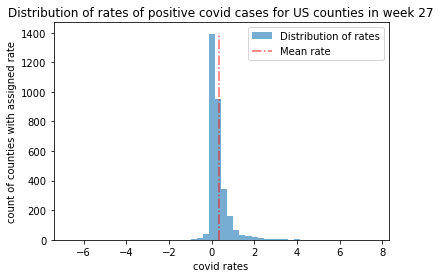

In [423]:
plt.hist(rate_w27, bins=50, alpha=0.6, label='Distribution of rates')
plt.vlines(np.mean(rate_w27),ymin=0,ymax=1400, color='r', linestyles='-.',alpha=0.6, label='Mean rate')
plt.xlabel('covid rates')
plt.ylabel('count of counties with assigned rate')
plt.title('Distribution of rates of positive covid cases for US counties in week 27')
plt.legend()
plt.show()

In [414]:
# Checking where the negative values come from:
rate_w27[rate_w27<0]
covid_merged.iloc[175,:];
# There seems to occur corrections in the cumulative number of covid cases, where it can be lowered.

##### Answer 1.6:
The plot shows that the rate of covid cases has a distribution that is right skewed with tails in both directions. I would originally not expect a left tail in this situation, but assume that this comes from corrections in the number of cases that is registered, in which it can end up having a lower registered cumulative number of cases in a later week.   
Other than that things are as expected with a peak around 0, with a right tail and a mean a bit higher than 0.

**1.7** We did the steps above (and some other minimal processing) and saved the results in `covid_clean.csv` for you.  Use this data file to answer some exploratory questions and all future analyses: 

1. Has the overall average case rate increased from week 28 (July 5-11) to week 29 (July 12-18)?  
2. Treating the counties as separate and equal observations: in what states did the case rate increase the most?  In what states did the case rate decrease the most (or increse the least)?  List the top 5 for each.  Do you notice any patterns in these states?
3. Create and interpret separate visuals to display how the country case rate in week 29 relates to each of the following variables. Interpret what you see (be specific to this domain).

    a. The political views in the county (as measured by the votergap in the 2020 election).
    
    b. The vaccination rate in the county (for week 28) (be sure to throw away the zeros as these represent unreported values).
    
    c. The population density of the county.
    
    d. Whether 50% or more of the surveyed residents in the county report that they always wore a mask in public at the time of the survey.

In [498]:
covid_clean = pd.read_csv('data/covid_clean.csv')

# Multiplying rate variables with 1000, to get rate per 1000 resident:
covid_clean['rate_w30'] = 1000*covid_clean['rate_w30']
covid_clean['rate_w29'] = 1000*covid_clean['rate_w29']
covid_clean['rate_w28'] = 1000*covid_clean['rate_w28']
covid_clean['rate_w27'] = 1000*covid_clean['rate_w27']

In [499]:
#Q1.7.1: Has the overall average case rate increased from week 28 (July 5-11) to week 29 (July 12-18)?
print('Overall average case rate week 28: {:.4}'.format(np.mean(covid_clean['rate_w28'])))
print('Overall average case rate week 29: {:.4}'.format(np.mean(covid_clean['rate_w29'])))

print('Yes, the overall average case rate has increased from 0.46 to 0.66 positive cases per 1000 resident')

Overall average case rate week 28: 0.4607
Overall average case rate week 29: 0.6592
Yes, the overall average case rate has increased from 0.46 to 0.66 positive cases per 1000 resident


In [585]:
# Q1.7.2:

# Using Groupby to get an overview of rates for the states and weeks we care about:
state_rates       = covid_clean.groupby('state').agg({'rate_w28': np.mean, 'rate_w29': np.mean})
state_rate_change = state_rates['rate_w29']-state_rates['rate_w28']

# Sorting the rate changes from lowest to highest:
sorted_chang = pd.DataFrame(state_rate_change, columns=['rates']).sort_values(by=['rates'])
print('The five states that had the highest increase in covid rates between week 28 and 29:')
display(sorted_chang.tail())
print('The five states that had the highest decrease / lowest increase in covid rates between week 28 and 29:')
display(sorted_chang.head())

print('A pattern here is that the states with the highest increase (except Nevada) are all located close to each other, which makes sense as when there is a surge in covid cases it will normally spread geographically.')

The five states that had the highest increase in covid rates between week 28 and 29:


,rates
state,
Louisiana,0.423863
Nevada,0.455317
Arkansas,0.554481
Missouri,0.758939
Florida,1.120848


The five states that had the highest decrease / lowest increase in covid rates between week 28 and 29:


,rates
state,
Iowa,-0.214847
Colorado,-0.198926
Montana,-0.041464
Virginia,-0.009347
Utah,0.006025


A pattern here is that the states with the highest increase (except Nevada) are all located close to each other, which makes sense as when there is a surge in covid cases it will normally spread geographically.


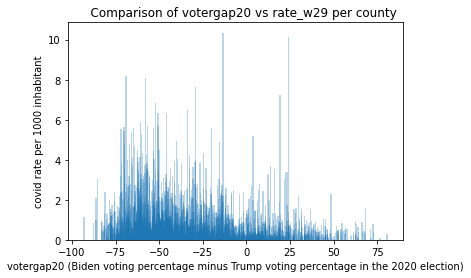

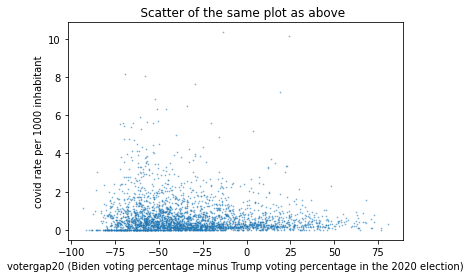

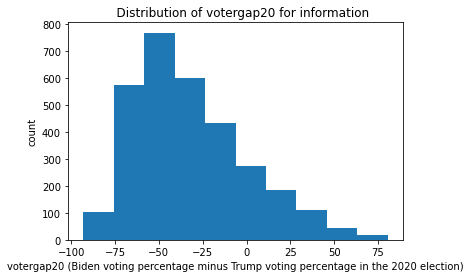

In [696]:
# Create and interpret separate visuals to display how the country case rate in week 29 relates to each of the following 
#variables. Interpret what you see (be specific to this domain).

# a. The political views in the county (as measured by the votergap in the 2020 election).
plt.bar(covid_clean['votergap20'], covid_clean['rate_w29'], alpha=0.3)
plt.xlabel('votergap20 (Biden voting percentage minus Trump voting percentage in the 2020 election)')
plt.ylabel('covid rate per 1000 inhabitant')
plt.title('    Comparison of votergap20 vs rate_w29 per county')
plt.show() # Could make subplots like I do in the next task, but thought this is just as fine here.
plt.scatter(covid_clean['votergap20'], covid_clean['rate_w29'], s=0.5, alpha=0.5)
plt.xlabel('votergap20 (Biden voting percentage minus Trump voting percentage in the 2020 election)')
plt.ylabel('covid rate per 1000 inhabitant')
plt.title('    Scatter of the same plot as above')
plt.show()
plt.hist(covid_clean['votergap20'])
plt.xlabel('votergap20 (Biden voting percentage minus Trump voting percentage in the 2020 election)')
plt.ylabel('count')
plt.title('    Distribution of votergap20 for information');

##### Answer Q1.7.3 a:
The plot of rates needs to be seen in relation to the histogram showing the density of counties for the different values of votergap20. This is because a higher density leads to a higher probability of getting one county for that value of votergap that is high enough for us to visually interpret this different from other readings in the bar plot.   
Since there is a higher density on the trump side of votergap20 we also need to be careful with interpreting the values in this area. A more fair comparison is comparing the values between votergap20: (-90)-(-75) with votergap20: 25-45, since these have a more similar amount of counties. When comparing these ranges we see that there is not a clear "winner", but the Biden side (25-45) seems to generally have lower rates, but with sporadic higher values that are on the same level as the compared Trump side.

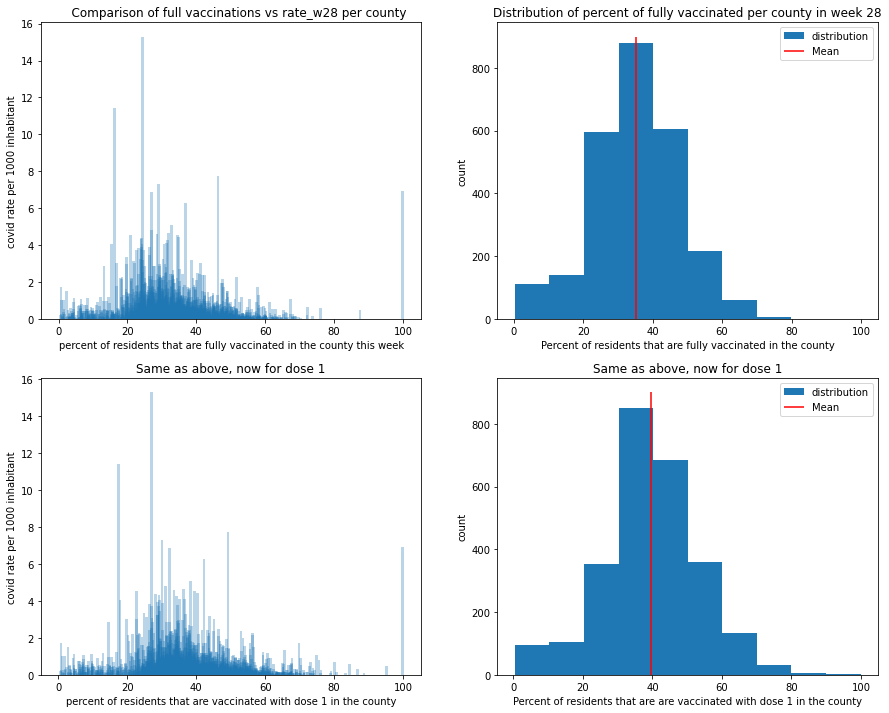

In [697]:
# b. The vaccination rate in the county for week 28:

# Dropping 0 values as suggested in the task:
covid_clean_drop0 = covid_clean[(covid_clean.fully_w28 != 0)&(covid_clean.dose1_w28 != 0)]
# Plotting for fully vaccinated:    
fig, ax = plt.subplots(2,2,figsize=(15,12))
ax[0,0].bar(covid_clean_drop0['fully_w28'], covid_clean_drop0['rate_w28'], alpha=0.3)
ax[0,1].hist(covid_clean_drop0['fully_w28'], label='distribution')
ax[0,1].vlines(np.mean(covid_clean_drop0['fully_w28']),ymin=0,ymax=900, color='r', label='Mean')
ax[0,0].set_xlabel('percent of residents that are fully vaccinated in the county this week')
ax[0,0].set_ylabel('covid rate per 1000 inhabitant')
ax[0,0].set_title('    Comparison of full vaccinations vs rate_w28 per county')
ax[0,1].set_xlabel('Percent of residents that are fully vaccinated in the county')
ax[0,1].legend()
ax[0,1].set_ylabel('count')
ax[0,1].set_title('Distribution of percent of fully vaccinated per county in week 28')
# looking at only dose 1:
ax[1,0].bar(covid_clean_drop0['dose1_w28'], covid_clean_drop0['rate_w28'], alpha=0.3)
ax[1,1].hist(covid_clean_drop0['dose1_w28'], label='distribution')
ax[1,1].vlines(np.mean(covid_clean_drop0['dose1_w28']),ymin=0,ymax=900, color='r', label='Mean')
ax[1,1].legend()
ax[1,0].set_xlabel('percent of residents that are vaccinated with dose 1 in the county')
ax[1,0].set_ylabel('covid rate per 1000 inhabitant')
ax[1,0].set_title('Same as above, now for dose 1')
ax[1,1].set_xlabel('Percent of residents that are are vaccinated with dose 1 in the county')
ax[1,1].set_ylabel('count')
ax[1,1].set_title('Same as above, now for dose 1')
plt.show()

In [ ]:
# Checking what the 100% value is:
np.sort(covid_clean_drop0['fully_w28'])
covid_clean_drop0[covid_clean_drop0['fully_w28']==99.9]
# Chattahoochee seems to have incorrect data about % vaccinations, and is registered to 99.9% in this set. 
# This does not align with what i find on Google and should be corrected, but I choose to let it be here.

##### Answer Q1.7.3 b:
From a first glance at the plots to the left we see high covid rates (above 5 per 1000) only for counties where vaccination rates are below 50% both when looking at dose 1 and fully vaccinated (not counting the faulty 99.9% vaccination from Chattahoochee).   
When we start digging deeper we need to remember that this bar plot will also have a higher chance of showing a high bar when there are more counties plotted at one range of vaccines (e.g. around 35% vaccinations there are much more occurrances than at 70+). However, on the histogram we can see a resemblence of normal distribution around 35 for 'fully' and 40 for 'dose1' (with a larger left tail on both). A good approach can be to interpret the difference on both sides of these means.    
With this in mind we see higher covid rates in the area to the left of each mean, than to the right, showing that the observed values of covid rates was higher for counties that has lower vaccination.   
Lastly we also need to remember that even though there is (probably) a causal relationship here, that cannot be determined without experimental testing. Theoretically these differences could be due to people in states with vaccinations are generally better at following rules than in states where it is not vaccinated as much, or similar.

<BarContainer object of 3108 artists>

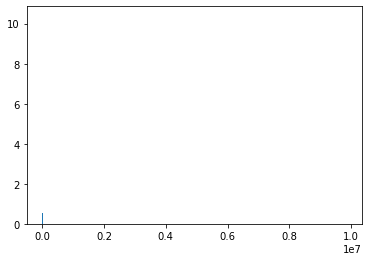

In [686]:
# Create and interpret separate visuals to display how the country 
#case rate in week 29 relates to each of the following variables. Interpret what you see (be specific to this domain).
# c. The population density of the county.
plt.bar(covid_clean['population'], covid_clean['rate_w29'])
plt.bo
# plt.xlabel('votergap20 (Biden voting percentage minus Trump voting percentage in the 2020 election)')
# plt.ylabel('covid rate per 1000 inhabitant')
# plt.title('    Comparison of votergap20 vs rate_w28 per county')
# plt.show()
# d. Whether 50% or more of the surveyed residents in the county report that they always wore a mask in public at the time of the survey.

##### Answer 1.7:  (Recap for convenience, they are also answered below each excercise)
Q1.7.1: Check answer under the excercise  
Q1.7.2: Check answer under the excercise  
Q1.7.3 
- a: Check answer under the excercise
- b: Check answer under the excercise

---

## Question 2 [35pts]: Regression modeling 

**2.1** Fit a linear regression model to predict `rate_w29` (which represent the rate of new cases in the week of July 12-18) from `rate_w28` (July 5-11). Report the 95% confidence intervals for the coefficients, and carefully interpret the coefficients (including their statistical significances).  What does this model suggest about whether the rate of COVID infection increased from week 28 to week 29?


**2.2** Fit a linear regression model to predict `rate_w29` from `rate_w28` and `votergap20` along with the interaction between the two.  Interpret the coefficient estimates carefully (no need to mention significances).


**2.3** Create a scatterplot of `rate_w29` vs. `rate_w28`.  Add 3 separate predicted lines from your model in 2.2 to this scatterplot: the predicted line from the model in 2.2 for counties...
    1. where Biden was favored by 50 percentage points.
    2. where Biden and Trump were equal
    3. where Trump was favored by 50 percentage points.
Interpret what you see.


**2.4** Fit a linear regression model to assess the overall association of vaccination rate (`fully_w28`) on `rate_w29`.  Carefully interpret the results (including the statistical significance).  


**2.5** Many counties have the value zero for `fully_w28` which really represents a missing/unreported value for vaccinationr rate.  Comment on the effect of ignoring this issue can have on the intepretations and inferences in the model in 2.4.  What would be a better way of handling this issue?


**2.6** What factors could be confounded (whether mesured here or not) with the result seen in the model from 2.3 (list up to 3)?  Fit an appropriate linear model that controls for as many of these factors as possible (for those that are measured in this data set). Interpret the coefficient estimates from this model and compare to the results from 2.4.

**2.7** What major issue could arise if you fit a model to predict `rate_w29` from `rate_w28` and `rate_w27` (or from `fully_w28` and `fully_w27`) in a linear regression model?  Suggest and explain the use of two different approaches to account for this: one approach should be based on modeling and one approach should be based on feature engineering/variable transformations (not PCA). 

**2.8** The test set has a response variable that is `rate_w30`.  How would you use your models to predict `rate_w29` in this section in order to predict `rate_w30` instead?  Explain.  What could go wrong in this modification?

**Hint**: what should be the predictors to predict `rate_w30` instead of `rate_w29`? 


## Answers

**2.1** Fit a linear regression model to predict `rate_w29` (which represent the rate of new cases in the week of July 12-18) from `rate_w28` (July 5-11). Report the 95% confidence intervals for the coefficients, and carefully interpret the coefficients (including their statistical significances).  What does this model suggest about whether the rate of COVID infection increased from week 28 to week 29?


In [ ]:
######
# your code here
######

*your answer here*

**2.2** Fit a linear regression model to predict `rate_w29` from `rate_w28` and `votergap20` along with the interaction between the two.  Interpret the coefficient estimates carefully (no need to mention significances).


In [ ]:
######
# your code here
######

*your answer here*

**2.3** Create a scatterplot of `rate_w29` vs. `rate_w28`.  Add 3 separate predicted lines from your model in 2.2 to this scatterplot: the predicted line from the model in 2.2 for counties...
    1. where Biden was favored by 50 percentage points.
    2. where Biden and Trump were equal
    3. where Trump was favored by 50 percentage points.
Interpret what you see.




In [ ]:
######
# your code here
######

*your answer here*

**2.4** Fit a linear regression model to assess the overall association of vaccination rate (`fully_w28`) on `rate_w29`.  Carefully interpret the results (including the statistical significance).  




In [ ]:
######
# your code here
######

*your answer here*

**2.5** Many counties have the value zero for `fully_w28` which really represents a missing/unreported value for vaccinationr rate.  Comment on the effect of ignoring this issue can have on the intepretations and inferences in the model in 2.4.  What would be a better way of handling this issue?




*your answer here*

**2.6** What factors could be confounded (whether mesured here or not) with the result seen in the model from 2.3 (list up to 3)?  Fit an appropriate linear model that controls for as many of these factors as possible (for those that are measured in this data set). Interpret the coefficient estimates from this model and compare to the results from 2.4.



In [ ]:
######
# your code here
######

*your answer here*

**2.7** What major issue could arise if you fit a model to predict `rate_w29` from `rate_w28` and `rate_w27` (or from `fully_w28` and `fully_w27`) in a linear regression model?  Suggest and explain the use of two different approaches to account for this: one approach should be based on modeling and one approach should be based on feature engineering/variable transformations (not PCA). 



*your answer here*

**2.8** The test set has a response variable that is `rate_w30`.  How would you use your models to predict `rate_w29` in this section in order to predict `rate_w30` instead?  Explain.  What could go wrong in this modification?

**Hint**: what should be the predictors to predict `rate_w30` instead of `rate_w29`? 


*your answer here*

---

## Question 3 [30pts]: Prediction modeling 

**3.1** Fit a well-tuned lasso model to predict `rate_w29` from the following set of predictors (along with all 2-way interactions among the main effects and all 2nd and 3rd order polynomial terms):

`['rate_w28','rate_w27','dose1_w28','hispanic','minority','female','unemployed', 'income','nodegree','bachelor','inactivity','obesity','density','votergap20']`

Report and explain the best choice of $\lambda$ (a visual can help with this), your estimate of out-of-sample $R^2$, along with the number of coefficients that shrunk exactly to zero (or numerically zero) and the number that are non-zero.

**3.2** Plot the trajectory curves of the main effects `['rate_w28','rate_w27','fully_w28','votergap20']` from this model: the estimates of the $\beta$ coefficients as a function of $\lambda$.  Interpret what you notice.

**3.3** Fit a well-tuned random forest model to predict `rate_w29` from the predictors listed in 3.1.  Report your choice of the tuning parameters and briefly justify your choices (a visual or table may be helpful for this).  Provide an estimate of out-of-sample $R^2$.  Note: do not go to crazy with the number of options for the parameters you are tuning...choose a set of values that are reasonable.

**3.4** Interpret the relationship between `rate_w29` and `dose1_w28` from the random forest model in 3.3.  Is there any evidence of interactive effects in this model involving `dose1_w28`?  How do you know?  Provide a reasonable visual (or a few visuals) to help you with these tasks and interpret what you see. 

**3.5** Fit a well-tuned boosting model to predict `rate_w29` from the predictors listed in 3.1.  Report your best choice of the tuning parameters and briefly justify your choice (a visual or table may be helpful for this).  Provide an estimate of out-of-sample $R^2$.  Note: again, do not go to crazy with the number of options for the parameters you are tuning...choose a set of values that are reasonable.

**3.6** Improve upon your favorite/best predictive model from 3.1, 3.3, or 3.5, by including other provided feature, by doing feature engineering, or by doing variable removal/selection.  Explain your choices.  Provide an estimate of out-of-sample $R^2$. 

**3.7** Evaluate your models from 3.1, 3.3, 3.5, and 3.6 on the test set (this will take some work...refer back to 2.8) using $R^2$.  How do these model's $R^2$ in test compare to the out-of-sample $R^2$ when tuning?  Explain whether this is surprising or not?



## Answers

**3.1** Fit a well-tuned lasso model to predict `rate_w29` from the following set of predictors (along with all 2-way interactions among the main effects and all 2nd and 3rd order polynomial terms):

`['rate_w28','rate_w27','dose1_w28','hispanic','minority','female','unemployed', 'income','nodegree','bachelor','inactivity','obesity','density','votergap20']`

Report and explain the best choice of $\lambda$ (a visual can help with this), your estimate of out-of-sample $R^2$, along with the number of coefficients that shrunk exactly to zero (or numerically zero) and the number that are non-zero.


In [ ]:
######
# your code here
######

Corrections:
Q3.1: please ignore/remove 'cancer' from this list of predictors.
Q3.2: 'fully_w28' should be replaced with 'dose1_w28'

*your answer here*

**3.2** Plot the trajectory curves of the main effects `['rate_w28','rate_w27','fully_w28','votergap20']` from this model: the estimates of the $\beta$ coefficients as a function of $\lambda$.  Interpret what you notice.


In [ ]:
######
# your code here
######

*your answer here*

**3.3** Fit a well-tuned random forest model to predict `rate_w29` from the predictors listed in 3.1.  Report your choice of the best tuning parameters and briefly justify your choice (a visual or table may be helpful for this).  Provide an estimate of out-of-sample $R^2$.  Note: do not go to crazy with the number of options for the parameters you are tuning...choose a set of values that are reasonable.


In [ ]:
######
# your code here
######

*your answer here*

**3.4** Interpret the relationship between `rate_w29` and `dose1_w28` from the random forest model in 3.3.  Is there any evidence of interactive effects in this model involving `dose1_w28`?  How do you know?  Provide a reasonable visual (or a few visuals) to help you with these tasks and interpret what you see. 



In [ ]:
######
# your code here
######

*your answer here*

**3.5** Fit a well-tuned boosting model to predict `rate_w29` from the predictors listed in 3.1.  Report your best choice of the tuning parameters and briefly justify your choice (a visual or table may be helpful for this).  Provide an estimate of out-of-sample $R^2$.  Note: again, do not go to crazy with the number of options for the parameters you are tuning...choose a set of values that are reasonable.



In [ ]:
######
# your code here
######

*your answer here*

**3.6** Improve upon your favorite/best predictive model from 3.1, 3.3, or 3.5, by including other provided feature, by doing feature engineering, or by doing variable removal/selection.  Explain your choices.  Provide an estimate of out-of-sample $R^2$. 



In [ ]:
######
# your code here
######

*your answer here*

**3.7** Evaluate your models from 3.1, 3.3, 3.5, and 3.6 on the test set (this will take some work...refer back to 2.8) using $R^2$.  How do these model's $R^2$ in test compare to the out-of-sample $R^2$ when tuning?  Explain whether this is surprising or not?

In [ ]:
######
# your code here
######

*your answer here*

---

## Question 4 [10pts]: Going further

**4.1** Use all of the useable variables in `demo` and `masks` to create clusters of observations based on the $K$-means clustering approach.  Be sure to carefully select a reasonable choice for $K$.  Explain your choice (a visual may help with this).

**4.2** Use your created clusters and incorporate them as predictor(s) into a linear regression model to assess whether the relationships you measured in the model from 2.6 depend on cluster type.  Comment on what you notice.  Determine whether out-of-sample $R^2$ has improved using this model (in comparison to the model from 2.6) based on 5-fold CV.

**4.3: BONUS** Find data online to improve the prediction accuracy of your best model. Be sure to cite your source of your data and the approach you took into incorporating these new data.  Note: this is only worth up to 3 bonus points, so do not spend too much effor on this part over improving ealrier parts of the exam.

## Answers

**4.1** Use all of the useable variables in `demo` and `masks` to create clusters of observations based on the $K$-means clustering approach.  Be sure to carefully select a reasonable choice for $K$.  Explain your choice (a visual may help with this).

In [ ]:
######
# your code here
######

*your answer here*

**4.2** Use your created clusters and incorporate them as predictor(s) into a linear regression model to assess whether the relationships you measured in the model from 2.6 depend on cluster type.  Comment on what you notice.  Determine whether out-of-sample $R^2$ has improved using this model (in comparison to the model from 2.6) based on 5-fold CV.


In [ ]:
######
# your code here
######

*your answer here*

**4.3: BONUS** Find data online to improve the prediction accuracy of your best model. Be sure to cite your source of your data and the approach you took into incorporating these new data.  Note: this is only worth up to 3 bonus points, so do not spend too much effor on this part over improving ealrier parts of the exam.

In [ ]:
######
# your code here
######



*your answer here*